In [ ]:
import cv2 # Изображение
import numpy as np # Матрицы
import matplotlib.pyplot as plt # графики/рамки

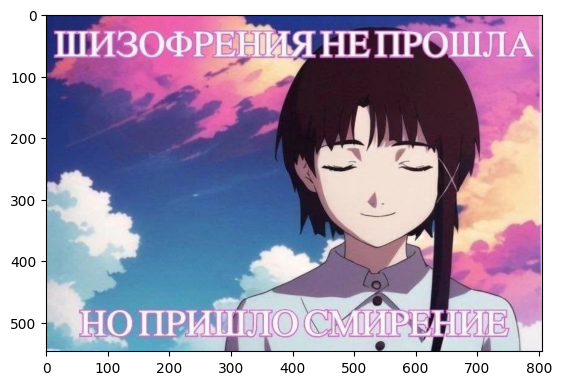

In [ ]:
img = cv2.imread("./mem.jpg")

result_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)

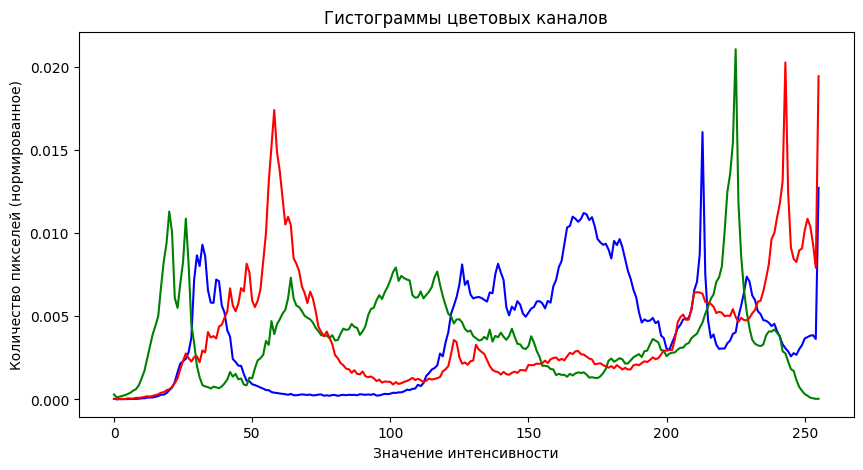

In [ ]:
b, g, r = cv2.split(img)

# Параметры гистограммы
hist_range = [0, 256]  # Диапазон значений (0-255)
bins = 256             # Количество бинов

# Вычисление гистограмм для каждого канала
hist_b = cv2.calcHist([b], [0], None, [bins], hist_range)
hist_g = cv2.calcHist([g], [0], None, [bins], hist_range)
hist_r = cv2.calcHist([r], [0], None, [bins], hist_range)

# Нормализация гистограмм (опционально)
hist_b = hist_b / hist_b.sum()
hist_g = hist_g / hist_g.sum()
hist_r = hist_r / hist_r.sum()

# Надписи
plt.figure(figsize=(10, 5))
plt.title("Гистограммы цветовых каналов")
plt.xlabel("Значение интенсивности")
plt.ylabel("Количество пикселей (нормированное)")

# Построение графиков
plt.plot(hist_b, color='blue', label='Синий (B)')
plt.plot(hist_g, color='green', label='Зеленый (G)')
plt.plot(hist_r, color='red', label='Красный (R)')

plt.show()

In [ ]:
def convolve_2d(img_gray, kernel):
  result = np.zeros(img_gray.shape) # Новый  масссив с нулями
  img_border = cv2.copyMakeBorder(
    img_gray,
    kernel.shape[0]//2,
    kernel.shape[1]//2,
    kernel.shape[0]//2,
    kernel.shape[1]//2,
    cv2.BORDER_REPLICATE
  ) # Добавить рамку для изображение
  for x in range(img_gray.shape[0]):
    for y in range(img_gray.shape[1]):
      area = img_border[x:x+kernel.shape[0], y:y+kernel.shape[1]] # Вырезать кусочек
      color = np.sum(area * kernel)
      result[x][y] = color

  return np.clip(result, 0, 255).astype(np.uint8)

In [ ]:
def convolve_rgb(image, kernel, times=1):
  result = image
  for i in range(times):
    b, g, r = cv2.split(result) # разделение на 3 цвета

    result_b = convolve_2d(b, kernel)
    result_g = convolve_2d(g, kernel)
    result_r = convolve_2d(r, kernel)

    result = cv2.merge([result_b, result_g, result_r]) # обратно свёртвывание

  return result

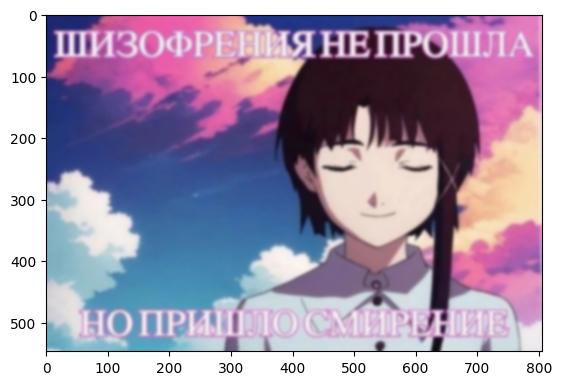

In [ ]:
box_blur_3 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],

]) / 9 # Box blur

result = convolve_rgb(img, box_blur_3, times=7)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)

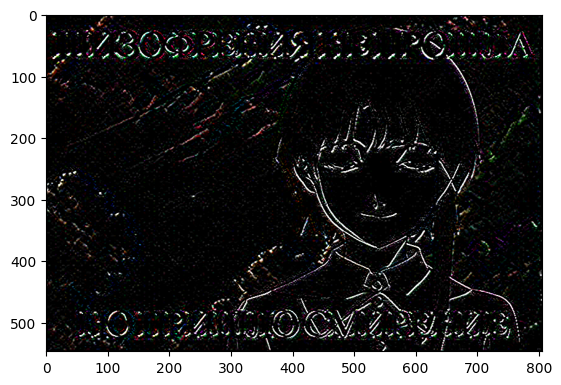

In [ ]:

sobel_hor = np.array([
   [-1, 0, 1],
   [-2, 0, 2],
   [-1, 0, 1],
])

sobel_ver = np.array([
   [1,  2,  1],
   [0,  0,  0],
   [-1, -2, -1],
])

result_hor = convolve_rgb(img, sobel_hor, times=1)
result = convolve_rgb(result_hor, sobel_ver, times=1)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)